In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
csv_file_path = 'C:\\Users\\Youssef\\Desktop\\M2\\MACHING\\Projet\\vehicules.csv'
df = pd.read_csv(csv_file_path)
print(df)
df.head()
df.dtypes

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Youssef\\Desktop\\M2\\MACHING\\Projet\\vehicules.csv'

In [37]:
df = df.drop('Date',axis=1)
df['Évaluations'] = df['Évaluations'].replace('Évaluations non disponibles', 0).astype(float)
df['Puissance_CH'] = df['Puissance'].str.extract('(\d+\.?\d*) CH').astype(float)
df['Prix'] = df['Prix'].str.replace('€', '').str.replace(' ', '').str.replace(',', '.').astype(float)
df['Kilométrage'] = df['Kilométrage'].str.replace('km', '').str.replace(' ', '').str.replace(',', '.').str.replace('- ', '0').astype(float)
df['Carburant'] = df['Carburant'].replace(['- Carburant','CNG'], 'Autre')
df['Transmission'] = df['Transmission'].replace(['- Boîte', 'Boite non disponible'], 'Autre')

# Autres manipulations et création de dummies
new_df = df.drop(['Nom de la Voiture', 'Version', 'Vendeur'], axis=1)
df_1 = pd.get_dummies(new_df, columns=['Modèle', 'Carburant', 'Transmission'])
df_new1 = df_1.drop(['Carburant_Autres', 'Puissance'], axis=1)
df_encoded = df_new1.dropna(subset=['Puissance_CH'])
df_encoded = df_encoded.drop(columns=['Carburant_Autre', 'Transmission_Autre'])

KeyError: "['Date'] not found in axis"

In [12]:
missing_values = df_encoded.isnull().sum()
print(missing_values)

Prix                              0
Kilométrage                       0
Évaluations                       0
Puissance_CH                      0
Modèle_audi                       0
Modèle_bentley                    0
Modèle_ferrari                    0
Modèle_fiat                       0
Modèle_ford                       0
Modèle_land-rover                 0
Modèle_mercedes-benz              0
Modèle_porsche                    0
Modèle_renault                    0
Modèle_toyota                     0
Modèle_volkswagen                 0
Carburant_Diesel                  0
Carburant_Electrique/Diesel       0
Carburant_Electrique/Essence      0
Carburant_Essence                 0
Transmission_Autre                0
Transmission_Boîte automatique    0
Transmission_Boîte manuelle       0
dtype: int64


In [13]:
df_encoded.head

<bound method NDFrame.head of          Prix  Kilométrage  Évaluations  Puissance_CH  Modèle_audi  \
0     74999.0      34000.0        122.0         340.0         True   
1     64995.0      51054.0        117.0         286.0         True   
2     52900.0     137482.0        109.0         286.0         True   
3     59950.0      99900.0        107.0         286.0         True   
4     73990.0      61100.0          0.0         286.0         True   
...       ...          ...          ...           ...          ...   
2465  54950.0      32043.0         35.0         250.0        False   
2466  64995.0      53476.0         96.0         249.0        False   
2467  47300.0       8000.0         17.0         163.0        False   
2468  15450.0     111363.0         96.0         241.0        False   
2469  35990.0      44673.0         78.0         150.0        False   

      Modèle_bentley  Modèle_ferrari  Modèle_fiat  Modèle_ford  \
0              False           False        False        False 

In [29]:
cols_of_interest = ['Prix', 'Kilométrage', 'Évaluations', 'Puissance_CH', 'Carburant_Electrique/Essence', 'Carburant_Essence','Transmission_Boîte automatique','Transmission_Boîte manuelle','Carburant_Electrique/Diesel','Carburant_Diesel']
subset_df = df_encoded[cols_of_interest]

# Calculez la matrice de corrélation pour ce sous-dataframe
correlation_matrix = subset_df.corr()

# Affichez la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

TypeError: 'module' object is not callable

In [30]:

carburant_dummy_totals = df_encoded[[col for col in df_encoded.columns if 'Carburant_' in col]].sum().sort_values(ascending=False)
transmission_dummy_totals = df_encoded[[col for col in df_encoded.columns if 'Transmission_' in col]].sum().sort_values(ascending=False)



In [31]:
plt.figure(figsize=(16, 5))

# Histogram for 'Puissance'
plt.subplot(1, 2, 1)
sns.histplot(df_encoded['Puissance_CH'], kde=True)
plt.title('Distribution de la puissance en chevaux')

plt.subplot(1, 2, 2)
sns.histplot(df['Évaluations'].dropna(), kde=True)
plt.title('Distribution of Évaluations')

plt.tight_layout()
plt.show()

TypeError: 'module' object is not callable

In [32]:
plt.figure(figsize=(18, 3))
plt.subplot(1, 2, 1)
sns.barplot(x=carburant_dummy_totals.index, y=carburant_dummy_totals.values, palette='viridis')
plt.title('Count of Carburant Types')
plt.xticks(rotation=45)




plt.subplot(1, 2, 2)
sns.barplot(x=transmission_dummy_totals.index, y=transmission_dummy_totals.values, palette='viridis')
plt.title('Count of Transmission Types')
plt.xticks(rotation=45)
plt.show()

TypeError: 'module' object is not callable

In [33]:
df_encoded.head()

,Prix,Kilométrage,Évaluations,Puissance_CH,Modèle_audi,Modèle_bentley,Modèle_ferrari,Modèle_fiat,Modèle_ford,Modèle_land-rover,...,Modèle_renault,Modèle_toyota,Modèle_volkswagen,Carburant_Diesel,Carburant_Electrique/Diesel,Carburant_Electrique/Essence,Carburant_Essence,Transmission_Autre,Transmission_Boîte automatique,Transmission_Boîte manuelle
0,74999.0,34000.0,122.0,340.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,64995.0,51054.0,117.0,286.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,52900.0,137482.0,109.0,286.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,59950.0,99900.0,107.0,286.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,73990.0,61100.0,0.0,286.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [34]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Prix'], kde=True, color='skyblue')
plt.xlabel('Prix')
plt.ylabel('Count')
plt.title('Distribution of Price')


plt.subplot(1, 2, 2)
sns.histplot(df['Kilométrage'], kde=True,color="green")
plt.title('la Distribution du Kilométrage')

plt.tight_layout()
plt.show()

TypeError: 'module' object is not callable

In [35]:
missing_values = df.isnull().sum()
print(missing_values)

Modèle                0
Prix                  0
Transmission          0
Version              30
Kilométrage           0
Carburant             0
Puissance             0
Évaluations           0
Vendeur               0
Nom de la Voiture     0
Puissance_CH          0
dtype: int64


AttributeError: module 'matplotlib' has no attribute 'show'

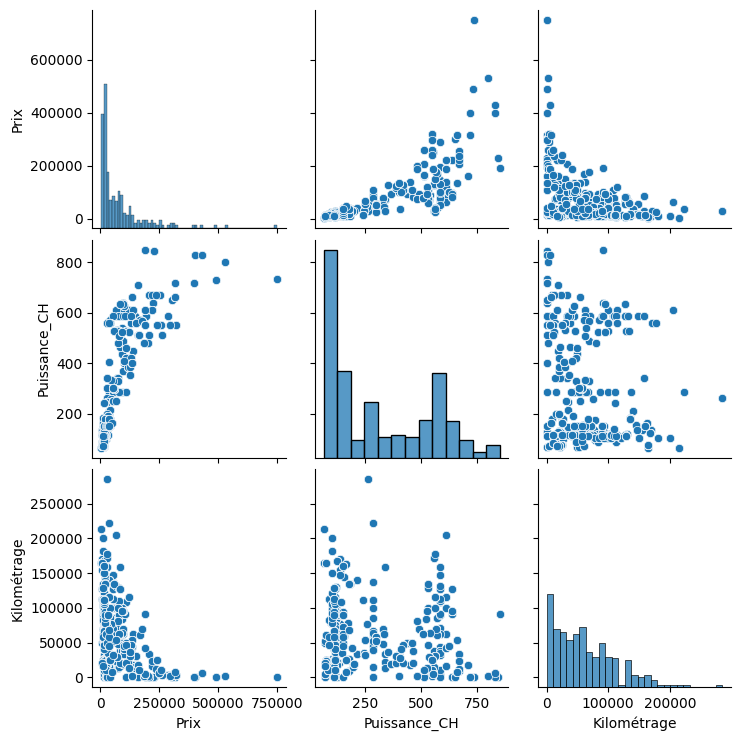

In [36]:
sns.pairplot(df[['Prix', 'Puissance_CH', 'Kilométrage']].dropna())
plt.show()

TypeError: 'module' object is not callable

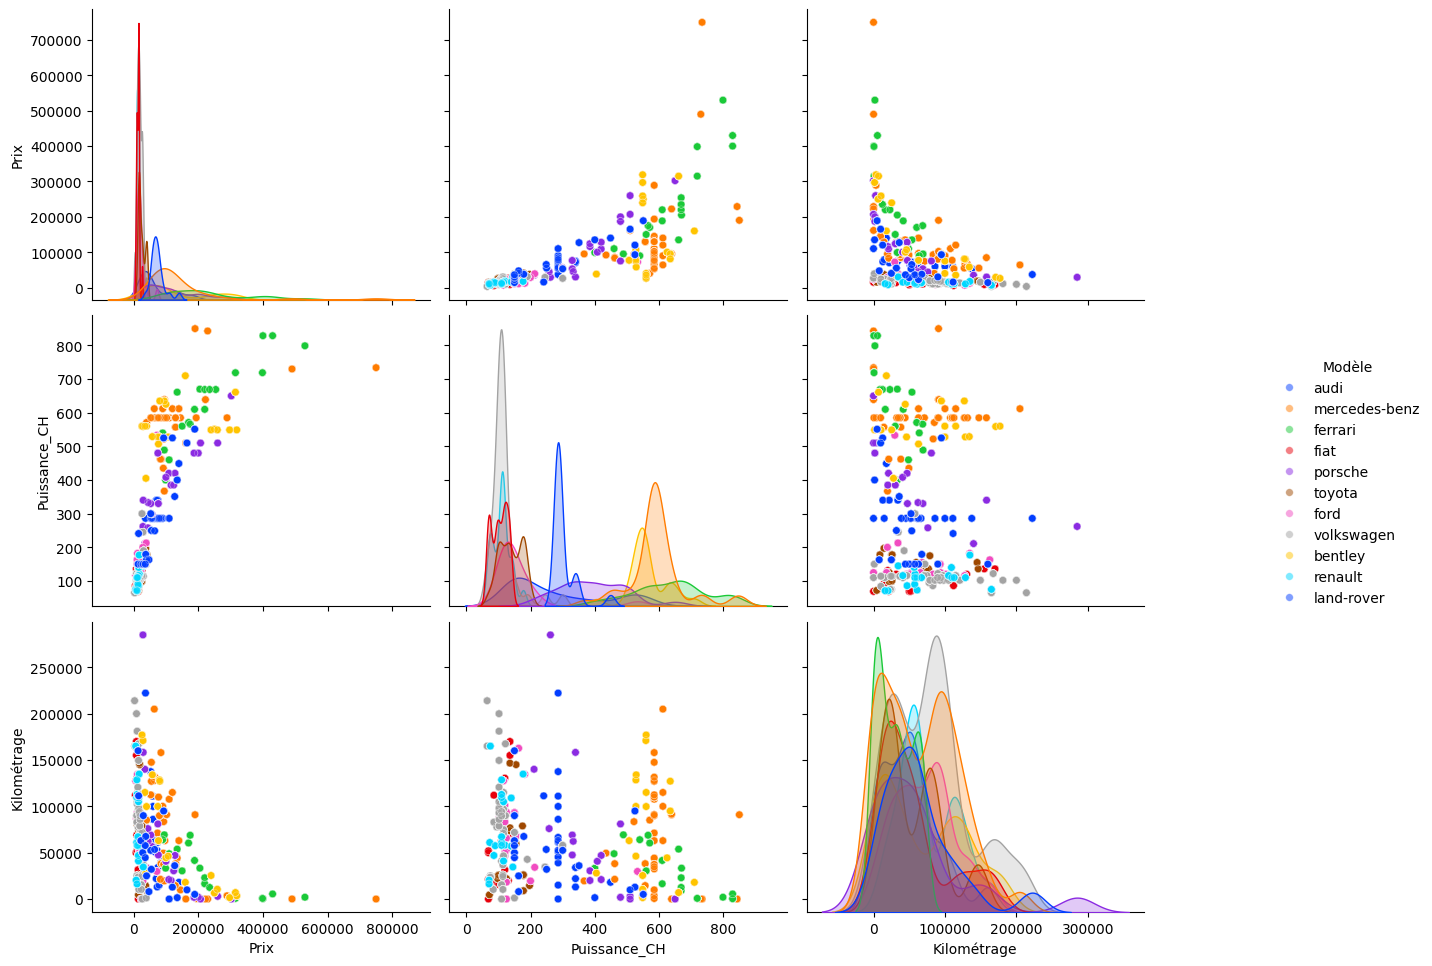

In [22]:


# Créer un pairplot avec une taille de point fixe pour une meilleure visibilité
pairplot = sns.pairplot(df[['Prix', 'Puissance_CH', 'Kilométrage', 'Modèle']].dropna(),hue='Modèle',
                        palette='bright', plot_kws={'alpha': 0.5, 's': 30})
# Améliorer la lisibilité lorsque de nombreux modèles différents sont présents
pairplot.fig.set_size_inches(15, 10)
plt.legend(title='Modèle', bbox_to_anchor=(1.05, 1), loc='upper left')
# Afficher le pairplot
plt.show()



AttributeError: module 'matplotlib' has no attribute 'show'

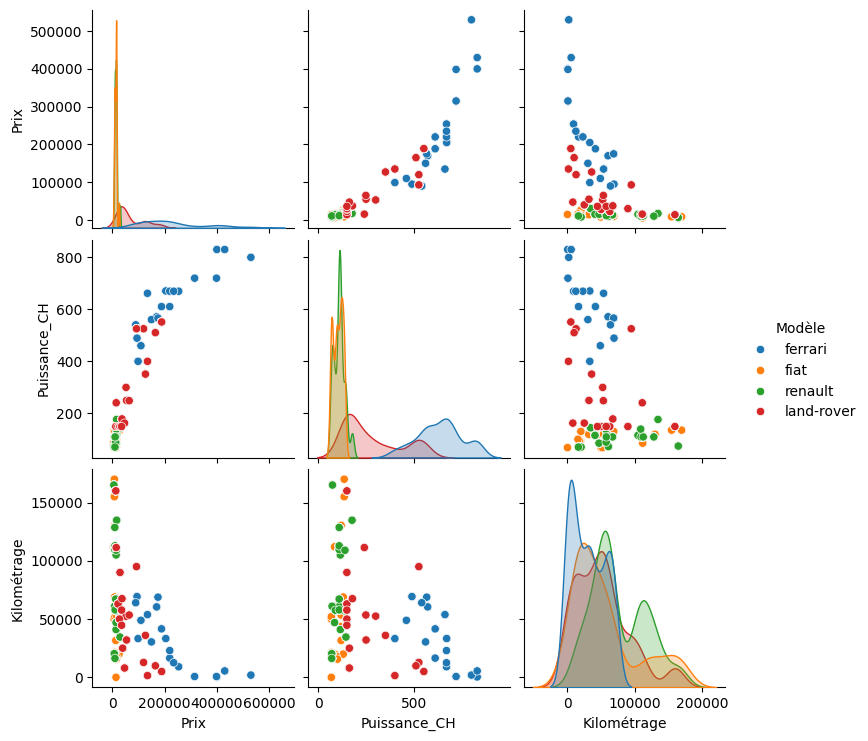

In [23]:
# Liste des modèles que vous souhaitez inclure
selected_models = ['mercedes', 'ferrari', 'land-rover', 'renault', 'fiat','lamborghini']

# Filtrer le DataFrame pour ne conserver que les modèles sélectionnés
df_selected_models = df[df['Modèle'].isin(selected_models)]

# Créer le pairplot pour les modèles sélectionnés
sns.pairplot(df_selected_models[['Prix', 'Puissance_CH', 'Kilométrage', 'Modèle']].dropna(), hue='Modèle')
plt.show()


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
df_new2= df_new1.dropna(subset=['Puissance_CH'])


In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
X = df_new2.drop('Prix', axis=1) 
y =df_new2['Prix'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)                                        


(1976, 21) (494, 21) (1976,) (494,)


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Créer le modèle de régression linéaire
model_lr = LinearRegression()

# Entraîner le modèle
model_lr.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_lr = model_lr.predict(X_test)

# Évaluer le modèle
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Erreur quadratique moyenne pour la régression linéaire:", mse_lr)

r2 = r2_score(y_test, y_pred_lr)
print(r2)

Erreur quadratique moyenne pour la régression linéaire: 2804217981.613683
0.6723677398602904


In [27]:
# Remplacez ces valeurs par les caractéristiques spécifiques du modèle de voiture que vous voulez évaluer
voiture_exemple = {
    'Modèle': ['lamborghini'],
    'Kilométrage': [100000],
    'Puissance_CH': [600],
    'Transmission_Boîte automatique':[True],}

# Créer un DataFrame à partir de ces caractéristiques
df_voiture = pd.DataFrame(voiture_exemple)

# Appliquer l'encodage one-hot si nécessaire
df_voiture_encoded = pd.get_dummies(df_voiture)

# Ajouter les colonnes manquantes et ajuster l'ordre des colonnes pour correspondre à X_train
for col in X_train.columns:
    if col not in df_voiture_encoded.columns:
        df_voiture_encoded[col] = 0
df_voiture_encoded = df_voiture_encoded[X_train.columns]

# Prédire le prix
prix_predit = model_lr.predict(df_voiture_encoded)

# Afficher le prix prédit
print("Prix prédit pour la voiture spécifiée:", prix_predit[0])

Prix prédit pour la voiture spécifiée: 286458.94812544633


In [28]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Utilisation de la validation croisée
scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcul de la RMSE pour chaque partition
rmse_scores = np.sqrt(-scores)

# Affichage des résultats
print("RMSE pour chaque fold:", rmse_scores)
print("RMSE moyen:", rmse_scores.mean())
print("Écart-type du RMSE:", rmse_scores.std())

RMSE pour chaque fold: [96691.16648608 55564.92263382 51419.51800086 63914.72054527
 49634.38957491]
RMSE moyen: 63444.943448188
Écart-type du RMSE: 17337.641248548447
